In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import ttest_1samp, ttest_ind # Para pruebas de hipótesis

## Distribución t de Student
Primero que nada tenemos que explicar la distribución t que se utiliza frecuentemente para las inferencias estadísticas.

La distribución t de Student, o mejor conocida simplemente como distribución t, es una distribución utilizada para estimar medias cuando la población se distribuye de forma normal y tomamos muestras pequeñas y desconocemos la desviación estandar poblacional.

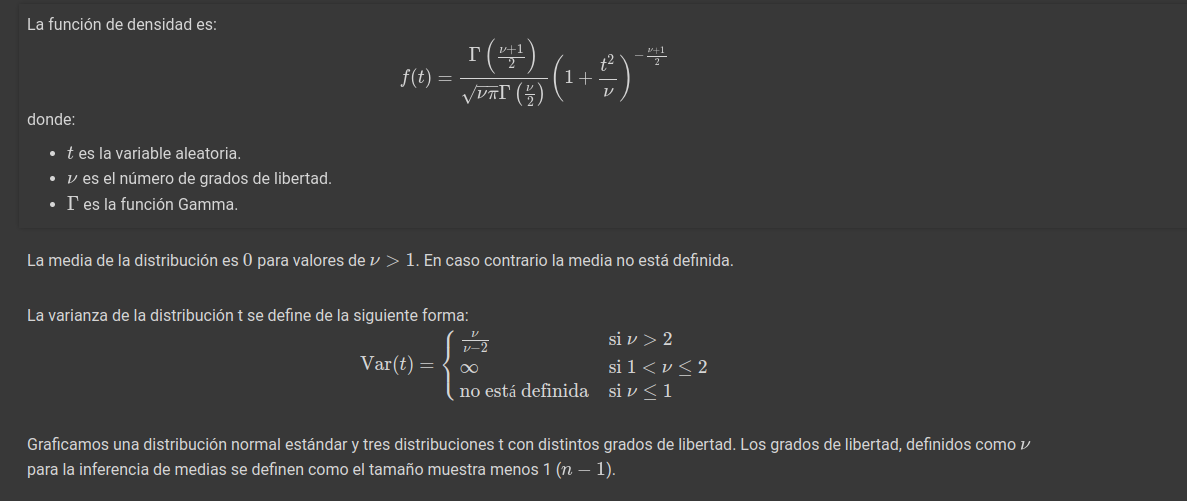

Antes de empezar debemos saber:
* El grado de libertad es la cantidad de datos que hay en la muestra menos la cantidad de parametros estimados (generalmente 1)
* A medida que los grados de libertad aumentar, la distribucion tiende a ser normal (mas o menos a partir de los 30 datos)
* El caso mostrado es uno que cumple con la teoria, por lo general no vamos a conocer mu y sigma, por lo que trabajaremos con una muestra, y de dicha muestra calculamos el IC con datos estimativos

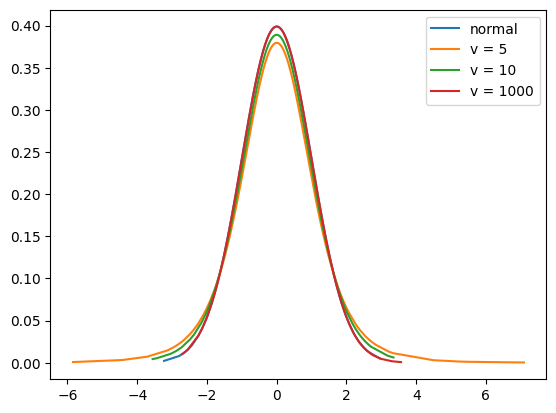

In [60]:
np.random.seed(123)
x_norm = np.random.normal(loc=0, scale=1, size=500)
x_norm = np.sort(x_norm)

"""
El parametro define los grados de libertad.
Generalmente se calculan los grados de libetad como: len(muestra) - 1
"""

x_t_5 = np.random.standard_t(df=5, size=500) 
x_t_5 = np.sort(x_t_5)

x_t_10 = np.random.standard_t(df=10, size=500)
x_t_10 = np.sort(x_t_10)

x_t_100 = np.random.standard_t(df=100, size=500)
x_t_100 = np.sort(x_t_100)

f_x_norm = stats.norm.pdf(x_norm, loc=0, scale=1)
f_x_t_5 = stats.t.pdf(x_t_5, df=5)
f_x_t_10 = stats.t.pdf(x_t_10, df=10)
f_x_t_100 = stats.t.pdf(x_t_100, df=1000)

plt.plot(x_norm, f_x_norm, label="normal")
plt.plot(x_t_5, f_x_t_5, label="v = 5")
plt.plot(x_t_10, f_x_t_10, label="v = 10")
plt.plot(x_t_100, f_x_t_100, label="v = 1000")
plt.legend()
plt.show()

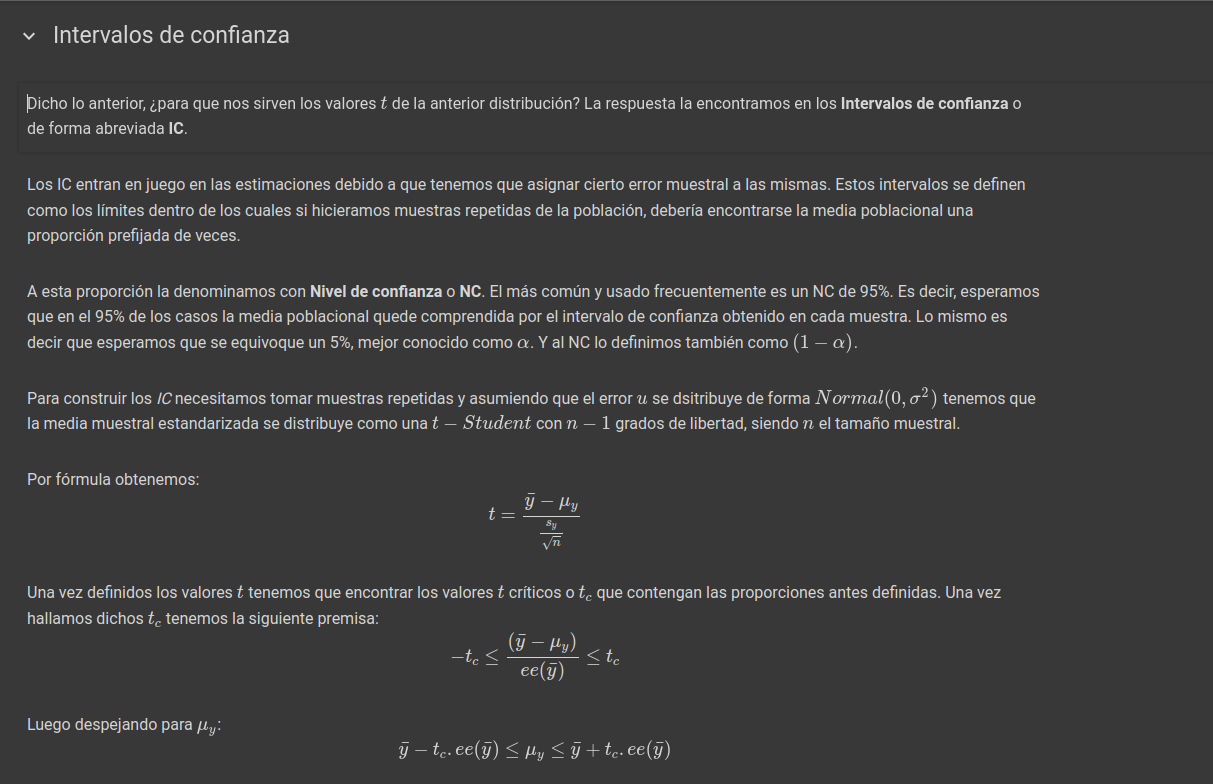

In [61]:
#Simulamos un ejemplo donde buscamos estimar con multiples muestras la media poblacional.
#En este dado damos como conocida el mu, y el sigma poblacional. 
mu = 30
sigma = 5
N = 100000 #Poblacion
np.random.seed(123)
x = np.random.normal(loc=mu, scale=sigma, size=N)

n = 1000 #Tamaño de muestra

Suponiendo que quiero encontrar un IC con el 95% de NC, entonces necesito primero encontrar el valor T.
Para ello vamos a establar la distribucion t de student y lo vamos a buscar estableciendo el NC que quiero, en este caso es 95%.

Lo que tengo que hacer es:
* Calculo mi valor p, que es el restante del NC. osea hago p = (1 - NC). p suele ser llamado alpha
* Ese nivel de p lo tengo que dividir en 2, ya que la distribucion T es simetrica a ambos lados. Y lo necesito para calcular el area de la fdp, hasta un porcentaje de (NC + p/2)%.
¿Porque hacemos esto? Porque internamente, lo que se hace al calcular esa area es obtener una probabilidad, y luego por propiedad puedo hacer 1 - P%, y obtengo la probabilidad restante que es (p/2) %. Esto es simetrico a ambos lados.


In [62]:
np.random.seed(123)

mu = 30
sigma = 5
N = 100000 #Poblacion

#Definimos los valores para el IC
nc = 0.95
p = 1 - nc # valor de alpha
p_2 = p / 2 #Porcentaje de cada cola (Izquierda y derecha)

#Tamaño de nuestra
n = 1000


In [63]:
stats.t.ppf(q= nc + p_2 , df=n-1)

1.9623414611334487

Si calculo el area solo del valor de p/2, obtengo el mismo resultado pero el contrario. Y funciona igual ya que es simetrica la distribucion, basicamente esto significa que si saco un valor t, lo que tengo que hacer para construir el IC es hacer (-t,t) (tener en cuenta el valor absoluto)

In [64]:
stats.t.ppf(q=0.025 , df=n-1)

-1.962341461133449

In [65]:
lim_inf = []
lim_sup = []

n = 1000
muestra_t = []

iters = 10000

t_c_95 = abs(stats.t.ppf(q=0.975, df=n-1))

np.random.seed(123)
for i in range(iters):
  muestra = np.random.choice(x, size=n, replace=True)

  t = (muestra.mean() - mu)/np.sqrt(muestra.var()/n)
  muestra_t.append(t)

  ee_x = np.sqrt(muestra.var()/n)

  lim_inf.append(muestra.mean() - t_c_95*ee_x)
  lim_sup.append(muestra.mean() + t_c_95*ee_x)

print(lim_inf)
print(lim_sup)

[29.478710291257148, 29.627573161599127, 29.689365666970918, 29.874389595068152, 29.604710467279045, 29.74203337061062, 29.58253687261591, 29.793310934948323, 29.748880292398724, 29.845219615251665, 29.762617920571657, 29.83852608052053, 29.596730788561278, 29.86363987874112, 29.465519379728505, 29.742806258958208, 29.766225337847125, 29.556910501406257, 29.702098939918294, 29.784688674348338, 29.709191001734293, 29.787580532176133, 29.913889234218246, 29.532746831226873, 29.418078098633384, 29.53101295205598, 29.73996509673881, 29.914098986219383, 29.492582620393, 29.820765428038854, 29.696342326588134, 29.78936992724297, 29.7718011120547, 29.769379122695206, 29.87091719396401, 29.84120218894992, 29.445240349282432, 29.732399242505167, 29.547641076689153, 29.640678150086053, 29.70545903548385, 29.683132885913174, 29.882342888455753, 29.800165593083328, 29.93187474710634, 29.69920297219446, 29.77839218225704, 29.739243492926413, 29.8574280929755, 29.462594370485725, 29.62182152726699, 

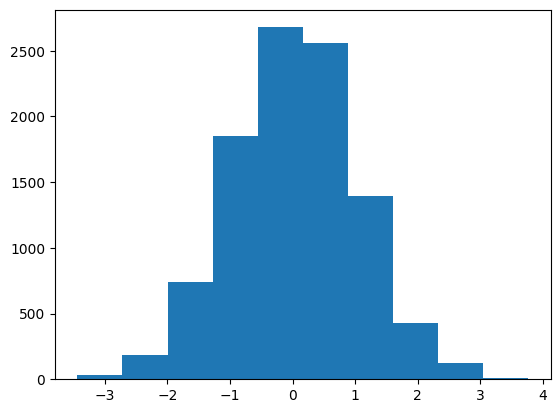

In [66]:
plt.hist(muestra_t)
plt.show()

Funcionamiento de T de student

Si ahora saco una probabilidad, que corresponde a la cantidad de veces que la media estuvo dentro del IC, me tendria que dar un valor cercano al nivel de MC establecido. 

In [67]:
porc_dentro = 0
for i in range(iters):
  if lim_inf[i] <= mu <= lim_sup[i]:
    porc_dentro = porc_dentro + 1

In [68]:
porc_dentro/iters*100

94.76

<h1> Hipotesis nula y alternativa </h1>

In [69]:
#  ==== OBTENCION DE DATOS

# Obtén la ruta absoluta del arhivo actual
current_dir = os.getcwd() 

path_datasets = os.path.join(current_dir,"datasets")

path_alojamiento = os.path.join(path_datasets,"AlojamientosAirBnb.csv") 

airbnb = pd.read_csv(path_alojamiento)
airbnb

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5
...,...,...,...,...,...,...,...,...,...,...,...
5391,5392,12,Private room,0,0.0,1,1,1,7,1155.622409,1
5392,5393,45,Entire home/apt,0,0.0,3,2,1,1,383.097032,1
5393,5394,70,Entire home/apt,0,0.0,3,1,1,7,470.436150,32
5394,5395,90,Entire home/apt,0,0.0,4,1,1,3,1911.506302,6


In [70]:

n = len(airbnb)
distancia_media = airbnb["distancia"].mean()
distancia_media

1033.2067528033988

Ahora supongamos que queremos analizar la posibilidad de que la media poblacional sea distinta de un número arbitrario por ejemplo 1000. Entonces tenemos las siguientes hipótesis:
$$ H_0:\mu_y=1000 $$
$$ H_1:\mu_y \neq 1000 $$

In [80]:
#Calculo la media y el error estandar
mu_0 = 1030
ee = np.std(airbnb['distancia']) / np.sqrt(n)

#ahora puedo calcular el valor t - (mu_muestral - mu_h_0) / ee
t = (distancia_media - mu_0) / ee
t

0.4979785389434634

Noten que si bien pongo un valor $\mu_y$ de 1000 me rechaza la $H_0$ fácilmente mientras que si pongo de 1030 no la rechaza. Esta diferencia viene marcada por un error estándar bajo, dada porque la variable 'distancia' tiene baja variabilidad alrededor de la media.

Suponiendo un 95% de NC, vamos a buscar los valores T correspondiente a nos n-1 grado de libertad

In [81]:
t_95 = abs(stats.t.ppf(q=0.975, df=n-1))
t_95 #Recordar que se pone 0.975 por una cuestion que ese 0.025 faltante se divide en las dos colas


1.9604037981614562

In [82]:
#Prueba de si se cumple el TEST de hipotesis construido con el intervalo t_95
#El intervalo tiene la forma (-t_95,t_95)

#EVALUACION - Si sale TRUE rechazamos H0, si sale FALSE quiere decir que pertenece al IC
#Por lo tanto se podria aceptar

t < -t_95 or t > t_95

False

In [74]:
t = ttest_1samp(airbnb["distancia"], mu_0, alternative="two-sided")
t

TtestResult(statistic=5.156218429519947, pvalue=2.609808885966375e-07, df=5395)

Otra posiblidad es cambiar la hipotesis nula, ya que hasta el momento trabajamos con una hipotesis nula que propone una prueba bilateral.
En algunos casos en necesario determinar si la media obtenida es mayor o menor, y esos casos utilizamos las pruebas de una sola cola.

Por ejemplo, planteando una hipotesis alternativa, donde busco un valor mayor al mu planteado, usaria el area HASTA EL 95% de los datos, si quiero un NC del 95%.

In [75]:
t_95 = abs(stats.t.ppf(q=0.95, df=n-1))
t_95

1.6451361167430656

In [83]:
#Hay que ejecutar el contenedor donde se creo t primero.
t > t_95

False

<h1> Prueba para proporciones </h1>

Las pruebas de proporciones son validar hipotesis sobre densidad, probabilidades y cosas relacionadas a la frecuencia de los datos.

In [84]:
#PRUEBA SOBRE UNA DISTRIBUCION BINOMIAL
airbnb["dos_personas"] = airbnb["personas"].apply(lambda x: 1 if x <= 2 else 0)

In [85]:
airbnb["dos_personas"].value_counts()

dos_personas
1    3195
0    2201
Name: count, dtype: int64

Para el caso de proporciones, al estar trabajando con una variable binomial, cambia la fórmula del desvío estándar muestral. Este nos queda igual a $ \sqrt{\frac{p(1-p)}{n}} $, por lo tanto, el valor $t$ queda:
$$
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
$$


Ahora supongamos que queremos rechazar la hipótes nula de que la proporción de alquileres para dos o menos personas representa menos del 50%. Tenemos que:
$$
H_o: p < 0.5
$$
$$H_1: p \geq 0.5$$

In [95]:
p = airbnb['dos_personas'].mean()
p_2 = 0.5

t = (p - p_2)/np.sqrt(p*(1-p)/n)

t_95 = abs(stats.t.ppf(q=0.95, df=n-1))
t_95

1.6451361167430656

In [91]:
t > t_95

True

In [98]:
#Esto es lo mismo, ya que son simetricas la distribucion t
t_05 = stats.t.ppf(q=0.05, df=n-1)
t < abs(t_05)

False